# Titanic - Machine Learning from Disaster

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
data_train = pd.read_csv('data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
data_y = data_train['Survived']

In [75]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check data

In [76]:
data_test['test'] = True
data_train['test'] = False
data = pd.concat([data_train, data_test], axis=0)
data.isna().sum(axis=0)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test              0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  test         1309 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 134.2+ KB


In [78]:
# person names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

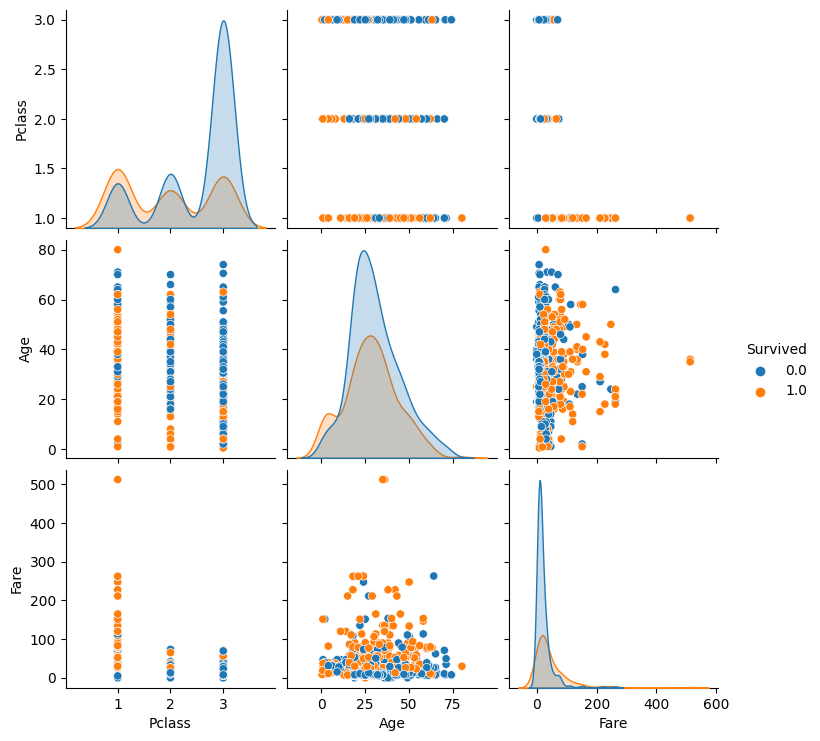

In [79]:
# dispertion graph by age, fare and Pclass
features = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(data[data['test'] == False][features], hue='Survived') 
plt.show()

In [81]:
# check missing values
data.isna().sum(axis=0)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test              0
Title             0
dtype: int64

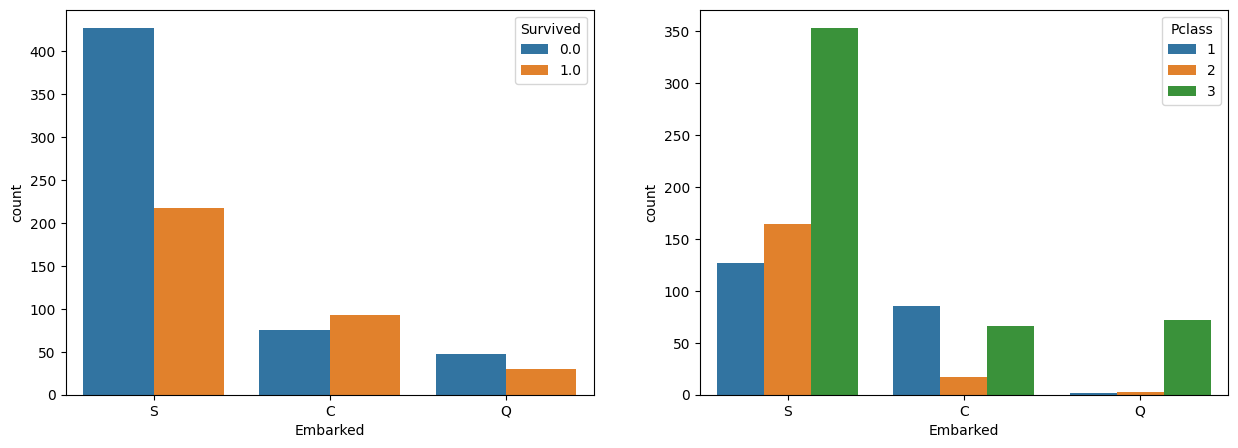

In [90]:
# Embarked
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Embarked', data=data[data['test'] == False], hue='Survived', ax=ax[0])
sns.countplot(x='Embarked', data=data[data['test'] == False], hue='Pclass', ax=ax[1])
plt.show()
data[data['Embarked'].isna()].head()
# fill missing values
data['Embarked'] = data['Embarked'].fillna('S')


In [94]:
# Fare
data[data['Fare'].isna()].head()
class_3 = data[data['Pclass'] == 3]
data['Fare'] = data['Fare'].fillna(class_3['Fare'].mean())

c:\Users\WillyCotrina\miniconda3\envs\jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WillyCotrina\AppData\Local\Temp\ipykernel_21244\3033356843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['GroupAge'] = pred


<Axes: xlabel='Age', ylabel='Fare'>

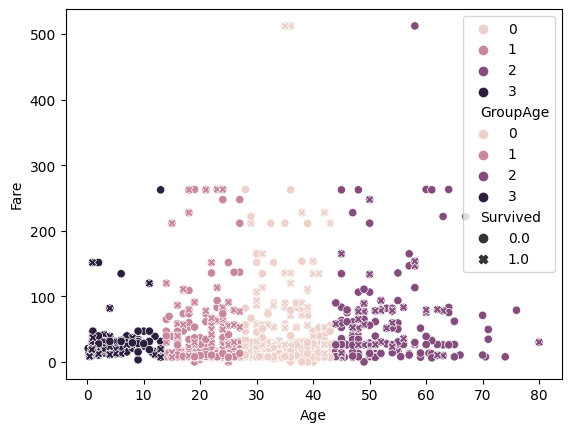

In [122]:
# Group data 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

model = KMeans(n_clusters=4)
age = data[(data['Age'].isna() == False) & (data['test'] == False)]
age_train = age_df[['Age', 'Pclass',  'SibSp', 'Parch']]
model.fit(age_train)

pred = model.predict(age_train)
age_df['GroupAge'] = pred
age_df.head()

sns.scatterplot(x='Age', y='Fare', data=age_df, hue='GroupAge')
# add survived mark
sns.scatterplot(x='Age', y='Fare', data=age_df, hue='GroupAge', style='Survived')

In [ ]:
# fare distribution
sns.displot(data['Fare'].dropna(), kde=True, bins=20)
plt.axvline(data['Fare'].median(), color='red')
plt.axvline(data['Fare'].mean(), color='green')
plt.show()

In [ ]:
# complete missing age with mean
data['Fare'].fillna(data['Fare'].median(), inplace=True)

data['FarePerPerson'] = data['Fare'] / (data['SibSp'] + data['Parch'] + 1)
# graph relation between fare and age of train data
#color survived
# two groups
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='Age', y='FarePerPerson', hue='Survived', data=data[data['test'] == False], ax=ax[0])
data['FarePerPersonGroup'] = pd.cut(data['FarePerPerson'], bins=[0, 20, 40, 80,  1000], labels=[0, 1, 2, 3])
data['FarePerPersonGroup'].fillna(0, inplace=True)
sns.barplot(x='FarePerPersonGroup', y='Survived', data=data[data['test'] == False], ax=ax[1])
plt.show()

In [ ]:
# graph relation between title 
# 0 = Don, Rev, Capt, Jonkheer, Mr
# 1 = Mme, Ms, Lady, Sir, Mlle, Countess
# 2 = Dr, Col, Major
# 3 = Mrs, Miss, Master
title = {
    'Mr': 0,
    'Don': 0,
    'Rev': 0,
    'Capt': 0,
    'Jonkheer': 0,
    'Mme': 1,
    'Ms': 1,
    'Lady': 1,
    'Sir': 1,
    'Mlle': 1,
    'Countess': 1,
    'Col': 2,
    'Major': 2,
    'Dr': 2,
    'Mrs': 3,
    'Miss': 3,
    'Master': 3,
}
data['Title'] = data['Title'].map(title)
data['Title'].fillna(2, inplace=True)
sns.barplot(x='Title', y='Survived', data=data[data['test'] == False])

In [ ]:
# Embarked C = Cherbourg, Q = Queenstown, S = Southampton
# C = 1, Q = 2, S = 3 and na = 0
data['Embarked'] = data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
sns.barplot(x='Embarked', y='Survived', data=data[data['test'] == False])
plt.show()
data[data['Embarked'].isna()]


In [ ]:
# compleate missing embarked with most common in this case with one beasue it is the most common
data['Embarked'].fillna(1, inplace=True)

In [ ]:
# Cabin
data['CabinType'] = data['Cabin'].str.extract('([A-Za-z])', expand=False)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
print(data['CabinType'].unique())
sns.barplot(x='CabinType', y='Survived', data=data[data['test'] == False], ax=ax[0])

sns.countplot(x='CabinType', hue='Pclass', data=data[data['test'] == False].sort_values('Pclass'), ax=ax[1])
# 
sns.boxplot(x='CabinType', y='Fare', data=data[(data['test'] == False) & (data['Fare'] < 500)], ax=ax[2])

In [ ]:
# ticket number
ticket = data['Ticket'].str.split(' ', expand=True)
ticket_number = ticket[1].where(~ticket[1].isna(), ticket[0])
ticket_number = ticket_number.replace('LINE', 0).replace('Basle', 0)
ticket_number = ticket_number.astype('float64')
data['Ticket number'] = ticket_number

In [ ]:
# Sex
data['Sex'] = (data['Sex'] == 'male').astype(int)
data.head()

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FarePerPerson', 'FarePerPersonGroup', 'Title', 'CabinType']
X_train = data[~data['test']][features]
X_test = data[data['test']][features]

X_train.isna().sum(axis=0)

In [ ]:
X_test.isna().sum(axis=0)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
# split train and cross validation
X_train, X_cv, y_train, y_cv = train_test_split(X_train, data_y, test_size=0.2)

In [ ]:
# model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
# train 
model.fit(X_train, y_train, epochs=1000, validation_data=(X_train, y_train))

23/23 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8975 - val_loss: 0.2889 - val_accuracy: 0.8919
Epoch 517/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8820 - val_loss: 0.2948 - val_accuracy: 0.8933
Epoch 518/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8919 - val_loss: 0.2970 - val_accuracy: 0.8961
Epoch 519/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8820 - val_loss: 0.2958 - val_accuracy: 0.8904
Epoch 520/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8904 - val_loss: 0.2891 - val_accuracy: 0.8961
Epoch 521/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8862 - val_loss: 0.2884 - val_accuracy: 0.9003
Epoch 522/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8876 - val_loss: 0.2871 - val_accuracy: 0.8947
Epoch 5

23/23 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8820 - val_loss: 0.2953 - val_accuracy: 0.8919
Epoch 581/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.8989 - val_loss: 0.2979 - val_accuracy: 0.8933
Epoch 582/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8890 - val_loss: 0.2822 - val_accuracy: 0.8975
Epoch 583/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8975 - val_loss: 0.2816 - val_accuracy: 0.9031
Epoch 584/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8876 - val_loss: 0.2869 - val_accuracy: 0.8961
Epoch 585/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8806 - val_loss: 0.2836 - val_accuracy: 0.9017
Epoch 586/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8919 - val_loss: 0.2846 - val_accuracy: 0.8947
Epoch 5

In [ ]:
# graph loss
sns.lineplot(data=model.history.history['loss'])
plt.show()

In [ ]:
# cross validation
cv = model.evaluate(X_cv, y_cv)
print('Cross validation loss: ', cv)

In [ ]:
# predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred.reshape(-1)

In [ ]:
# save to csv
submission = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_pred.reshape(-1)})
# File csv with 2 columns: PassengerId, Survived
submission.to_csv('data/submission.csv', index=False)
submission.head()

I have tried to use deep learning but I don't think it is the best model for this problem because the data is not enough. So I use random forest instead.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
data.head(10)

In [ ]:
# split in train and cross validation
num_cols = ['Age', 'Fare', 'FarePerPerson']
cat_cols = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FarePerPersonGroup', 'Title', 'CabinType']

features = num_cols + cat_cols
X_train = data[~data['test']][features]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, data_y, test_size=0.2)
X_test = data[data['test']][features]
X_cv.head(10)

In [ ]:
# columns type

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ] 
)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10))
])

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy  = accuracy_score(y_train, model.predict(X_train))
print('Accuracy: {}'.format(accuracy))
accuracy_cv  = accuracy_score(y_cv, model.predict(X_cv))
print('Accuracy CV: {}'.format(accuracy_cv))

In [ ]:
# predict
X_test.isna().sum(axis=0)

In [ ]:
# save to csv
submission = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_pred.reshape(-1)})
# File csv with 2 columns: PassengerId, Survived
submission.to_csv('data/submission_random_forest.csv', index=False)
submission.head()